# Total mRNA ratio inference

**Authors:** [Qiuyu Lian](xxx)

In this tutorial, we introduce how to infer the total mRNA ratio between two cell types, which is a basic application case of `TOMAS`. Three kinds of droplets, including `Homo-cell-type-1`, `Homo-cell-type-2` and `Hetero-dbl`, are required.

In [1]:
import tomas as tm
import scanpy as sc
import pickle
import numpy as np
import pandas as pd

Load data in `AnnData` form. The droplet labels should be stored in `adata.obs`.

In [2]:
adata = sc.read_h5ad('./tomas/datasets/Tcells_sparse.h5ad')
adata.obs

,danno
AAACCCAAGACGCCAA-1,Homo-naive
AAACCCAAGACTTCAC-1,Homo-naive
AAACCCACAAGTAGTA-1,Homo-naive
AAACCCACACATGAAA-1,Homo-naive
AAACCCACAGCTTTCC-1,Homo-naive
...,...
TTCTTGAGTGCCGTAC-1,Hetero-dbl
TTGGGATGTAACATCC-1,Hetero-dbl
TTGTTGTGTATTTCCT-1,Hetero-dbl
TTTACCAGTCTGTGTA-1,Hetero-dbl


Display the population size of each kind of droplet.

In [3]:
groupby = 'danno'
np.unique(adata.obs[groupby], return_counts=True)


(array(['Hetero-dbl', 'Homo-activated', 'Homo-naive'], dtype=object),
 array([1446, 8076, 8414]))

## Fit Dirichlet-Multinomial (DMN) Model

Fit Dirichlet-Multinomial (DMN) model of cell type 1

In [4]:
showtype = 'Homo-naive'
count_naive = adata[adata.obs[groupby]==showtype,:].X

filename = './prepareForRepo/re_test/alpha_subdata_1h/naive'

#alpha_naive, record_naive = tm.fit.estimateAlpha(count_naive, filename)

In [5]:
#tm.vis.AlphaOptProcess(record_naive)


Fit Dirichlet-Multinomial (DMN) model of cell type 2

In [ ]:
showtype = 'Homo-activated'
count_activated = adata[adata.obs[groupby]==showtype,:].X

filename = './prepareForRepo/re_test/alpha_subdata_1h/activated'

#alpha_activated, record_activated = tm.fit.estimateAlpha(count_activated, filename)
#tm.vis.AlphaOptProcess(record_activated)


## Merge genes into exclusive meta-genes

In [4]:
groupby = 'danno'
showtype = 'Hetero-dbl'
count_dbl = adata[adata.obs[groupby]==showtype,:].X

filename = './prepareForRepo/re_test/alpha_subdata_1h/dbl'

count_dbl.shape

(1446, 19303)

In [ ]:
'''
filename = '/home/qy/Documents/TOMAS/prepareForRepo/re_test/alpha_subdata_1h/naive'
f = open( filename+'.dmn.pickle','rb')
record_naive = pickle.load(f)
f.close()

filename = '/home/qy/Documents/TOMAS/prepareForRepo/re_test/alpha_subdata_1h/activated'
f = open( filename+'.dmn.pickle','rb')
record_activated= pickle.load(f)
f.close()

alpha_naive = record_naive['alpha'][-1]
alpha_activated = record_activated['alpha'][-1]
'''

In [6]:
alpha_df = pd.read_csv('/home/qy/Documents/dmn/results/EstimateAlpha/alpha.csv')

In [7]:
alpha_naive0 = alpha_df['singlet_naive'].values
alpha_activated0 = alpha_df['singlet_activated'].values


In [8]:
output = '/home/qy/Documents/TOMAS/prepareForRepo/re_test/Tcell'


one core, 19k genes, needs about 15 mins.
6 cores, 146s

In [9]:
mg_Alpha, mg_UMI = tm.emg.getExclMetaGene(alpha_naive0,
                                          alpha_activated0,
                                          count_dbl,
                                          output)


## Estimate $R$ with synthetic droplets

In [10]:
r_list = tm.est.estimateRatio(mg_Alpha, mg_UMI, output)


In [2]:
datapath = '/home/qy/Documents/DoubletNinja/simulation/results/realdata'
r_est = pd.read_csv(datapath+'/realdata_Rtrack.0.csv',header=0,index_col=0)
x = r_est.iloc[:,r_est.shape[1]-1]
#x_shrinkage,(lb,ub) = rm_outliers(x)

<Figure size 1536x2048 with 0 Axes>

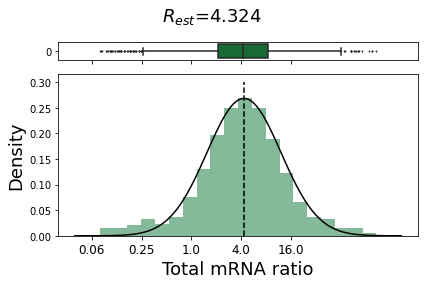

In [4]:
fig = tm.vis.LogRdist(x, return_fig=True)

In [6]:
fig.savefig('prepareForRepo/test.pdf')